## VWAP（出来高加重平均）

VWAP（その日の平均約定価格）を知ることができれば、VWAP価格で株を買えば少なくともその日に高値掴みすることはなくなり、平均的な価格で取引ができる

## Log returns

差分の対数をとってログで評価

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
book_trainparquet = pd.read_parquet("../input/book_train.parquet/stock_id=0")
book_testparquet = pd.read_parquet("../input/book_test.parquet/stock_id=0")

In [19]:
book_testparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [4]:
book_trainparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


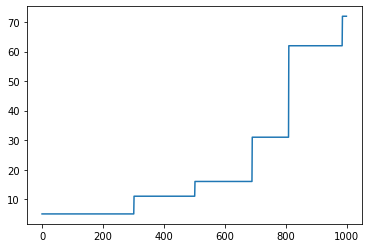

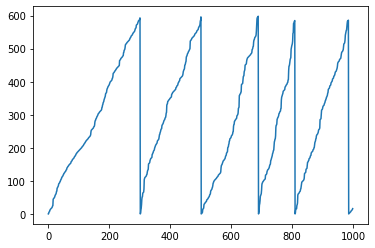

In [26]:
plt.plot(np.array(book_trainparquet["time_id"][:1000]))
plt.show()
plt.plot(np.array(book_trainparquet["seconds_in_bucket"][:1000]))

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_id', ylabel='count'>

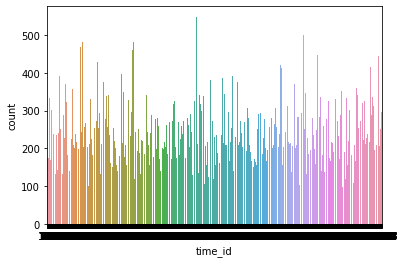

In [9]:
sns.countplot(book_trainparquet["time_id"])

## time_id = 5 に着目

In [11]:
book_data = book_trainparquet[book_trainparquet["time_id"]==5]

In [13]:
book_data

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
297,5,585,1.003129,1.003749,1.003025,1.003801,100,3,26,3
298,5,586,1.003129,1.003749,1.002612,1.003801,100,3,2,3
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3


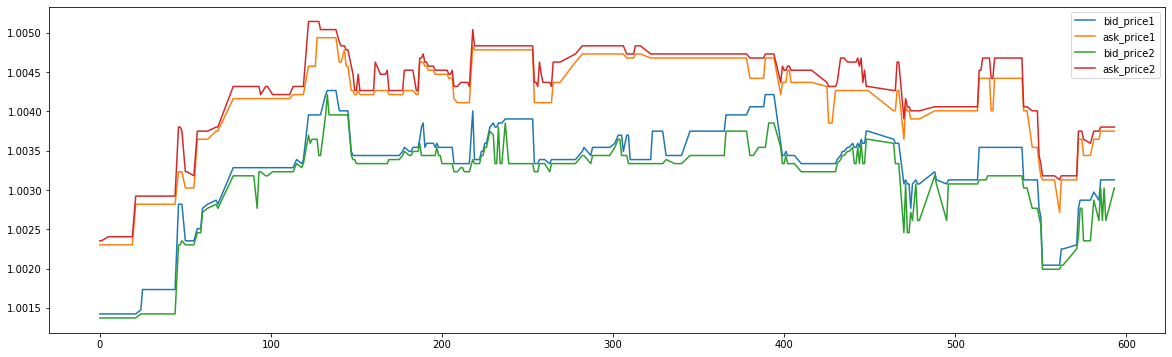

In [16]:
plt.figure(figsize=(20,6))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2','ask_price2']):
    plt.plot(book_data['seconds_in_bucket'],book_data[col],label=col)

plt.legend()
plt.show()

In [17]:
trade_testparquet = pd.read_parquet("../input/trade_test.parquet/stock_id=0")
trade_testparquet

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [18]:
trade_trainparquet = pd.read_parquet("../input/trade_train.parquet/stock_id=0")
trade_trainparquet

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


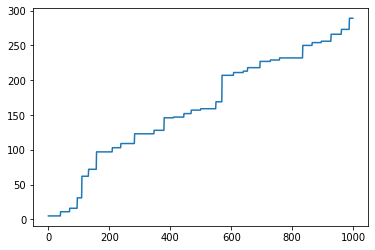

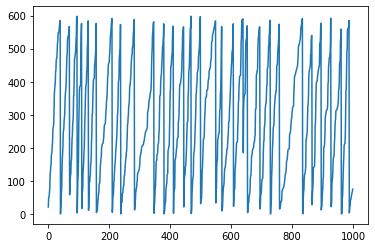

In [27]:
plt.plot(trade_trainparquet["time_id"][:1000])
plt.show()
plt.plot(trade_trainparquet["seconds_in_bucket"][:1000])

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_id', ylabel='count'>

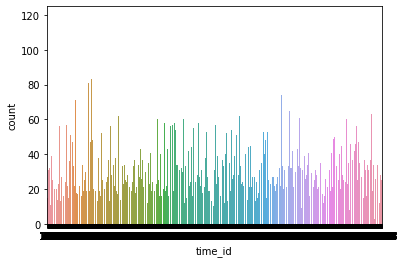

In [28]:
sns.countplot(trade_trainparquet["time_id"])

In [30]:
trade_data = trade_trainparquet[trade_trainparquet['time_id']==5 ]

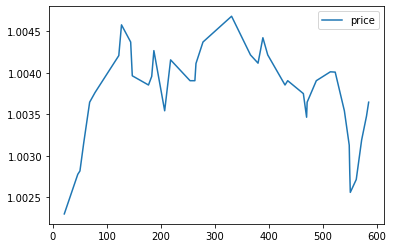

In [31]:
for i,col in enumerate(["price"]):
    plt.plot(trade_data['seconds_in_bucket'],trade_data[col],label=col)
plt.legend()
plt.show()

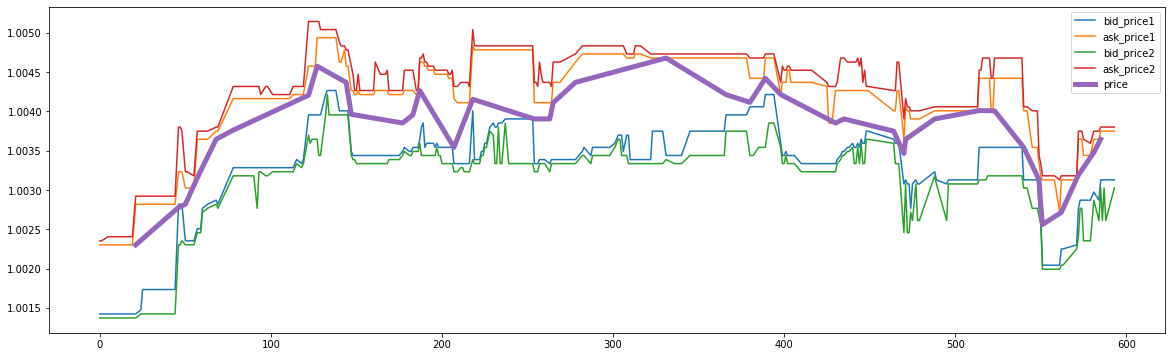

In [35]:
plt.figure(figsize=(20,6))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2','ask_price2']):
    plt.plot(book_data['seconds_in_bucket'],book_data[col],label=col)
plt.plot(trade_data['seconds_in_bucket'],trade_data["price"],label="price",lw=5)
plt.legend()
plt.show()

# ボラティリティについて
今回の目的変数,価格変動の度合い


In [36]:
test = pd.read_csv("../input/test.csv")
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [37]:
book_testparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [38]:
trade_testparquet

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [39]:
train = pd.read_csv("../input/train.csv")
train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [40]:
train['target'].describe()

count    428932.000000
mean          0.003880
std           0.002936
min           0.000105
25%           0.002026
50%           0.003048
75%           0.004738
max           0.070321
Name: target, dtype: float64

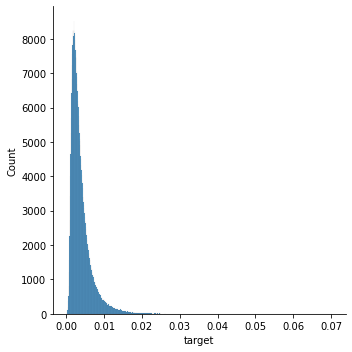

In [41]:
sns.displot(train["target"])

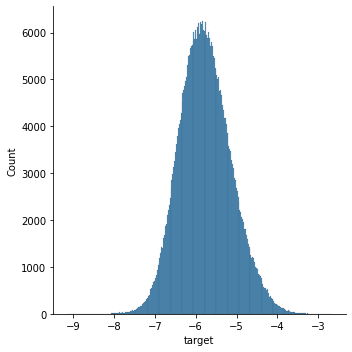

In [42]:
sns.displot(np.log(train["target"]))

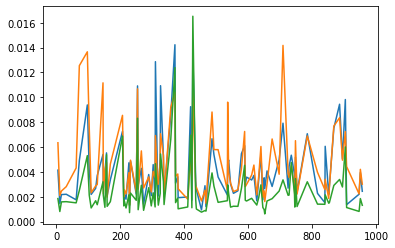

In [44]:
for d in [train[train['stock_id']==x]for x in range(3)]:
    plt.plot(d["time_id"][:100],d['target'][:100])


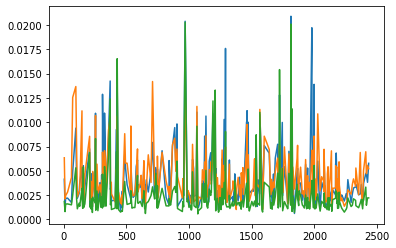

In [46]:
for d in [train[train['stock_id']==x]for x in range(3)]:
    plt.plot(d["time_id"][:300],d['target'][:300])


上のグラフより、stock_id(0,1,2)のtargetの増加するタイミングに少し関連性がありそう。

# 重要な変数の確認


In [47]:
def calc_wap(df):
    wap = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    return wap

In [50]:
wap = calc_wap(book_data)

0      1.001434
1      1.001448
2      1.001448
3      1.001443
4      1.001443
         ...   
297    1.003731
298    1.003731
299    1.003731
300    1.003731
301    1.003731
Length: 302, dtype: float64

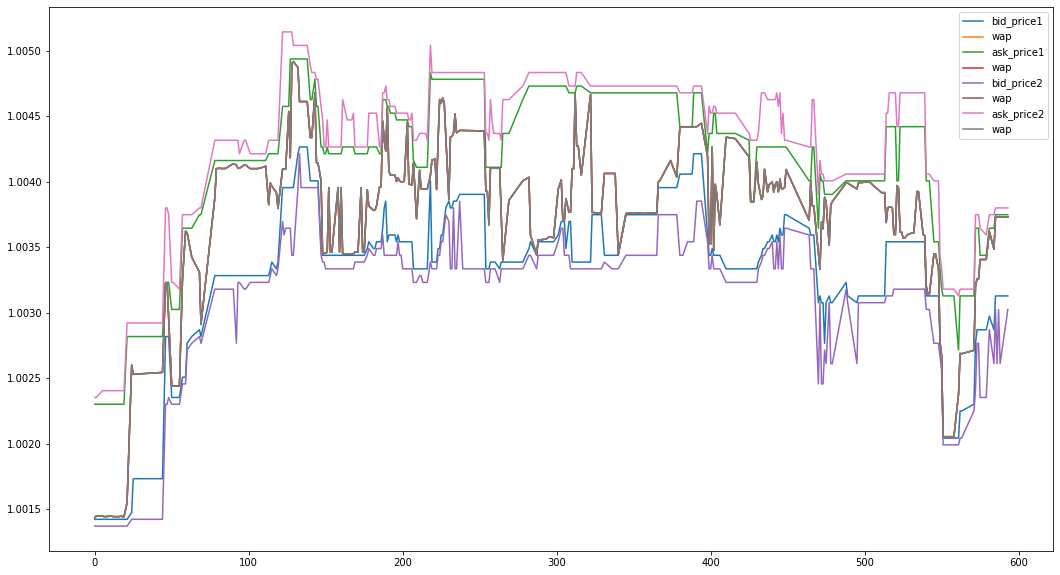

In [58]:
plt.figure(figsize=(18,10))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2', 'ask_price2']):
    plt.plot(book_data["seconds_in_bucket"],book_data[col],label=col)
    plt.plot(book_data["seconds_in_bucket"],wap,label="wap")
plt.legend()

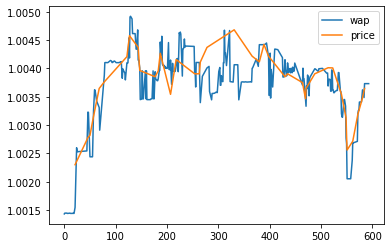

In [59]:
plt.plot(book_data["seconds_in_bucket"],wap,label="wap")
plt.plot(trade_data["seconds_in_bucket"],trade_data["price"],label="price")
plt.legend()

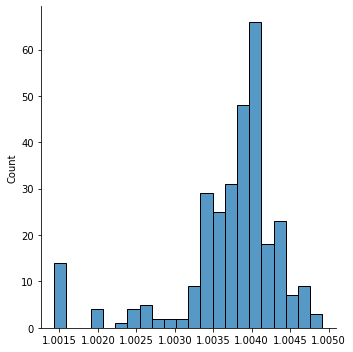

In [60]:
sns.displot(wap)

## log return

wap  →   
→ wapのlog  →   
→ wapのdiff   →   
→ log return（wapのlogのdiff）の順で可視化  



In [61]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

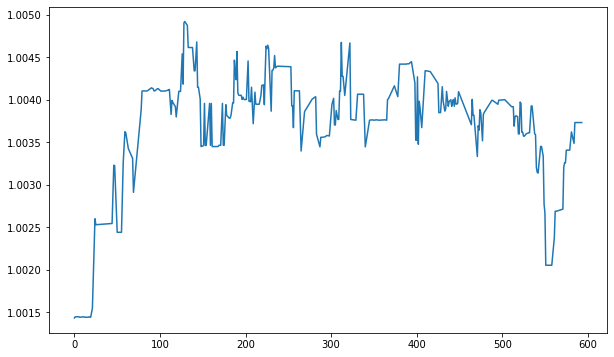

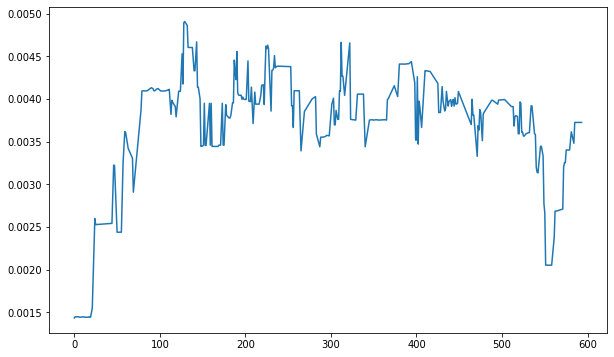

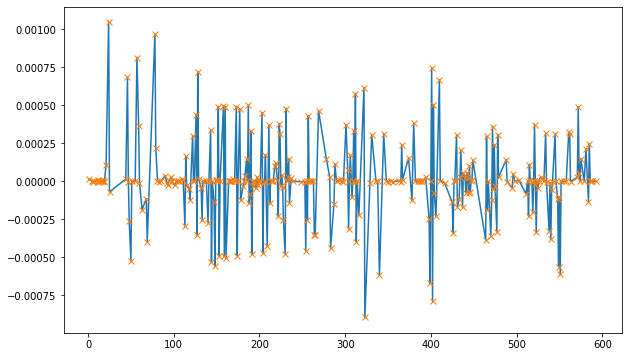

In [66]:
plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],wap)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],np.log(wap))
plt.show()

plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],wap.diff())

plt.plot(book_data["seconds_in_bucket"],log_return(wap),'x')
plt.show()

In [69]:
log_return_wap = log_return(wap)[1:]

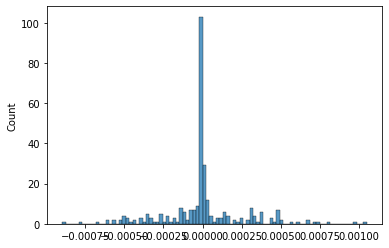

<AxesSubplot:ylabel='Count'>

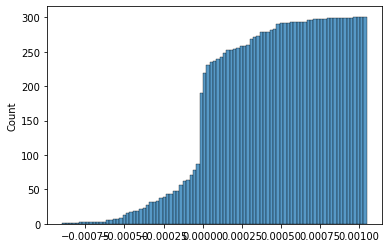

In [72]:
sns.histplot(log_return_wap)
plt.show()
sns.histplot( log_return_wap,cumulative = True )

# Realized volatility

bookのデータから計算されるrealized vovatilityを重要な指標としたほうが良いよ  
->  wapのlog returnの二乗和の平方根

In [73]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

In [75]:
realized_vol = realized_volatility(log_return(wap))
realized_vol

0.004499364172786559

In [77]:
train_list = [ 0,
               31,
               18, #ボラティリティの大きな銘柄
               43, #ボラティリティの小さな銘柄
             ]

book_trainparquet_list  = []

for i in train_list:
    book_trainparquet_list.append(pd.read_parquet("../input/book_train.parquet/stock_id="+str(i)))

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

id= 0
0.004499364172786559
id= 31
0.005556935255357987
id= 18
0.014390656273355174
id= 43
0.0018669488720552976


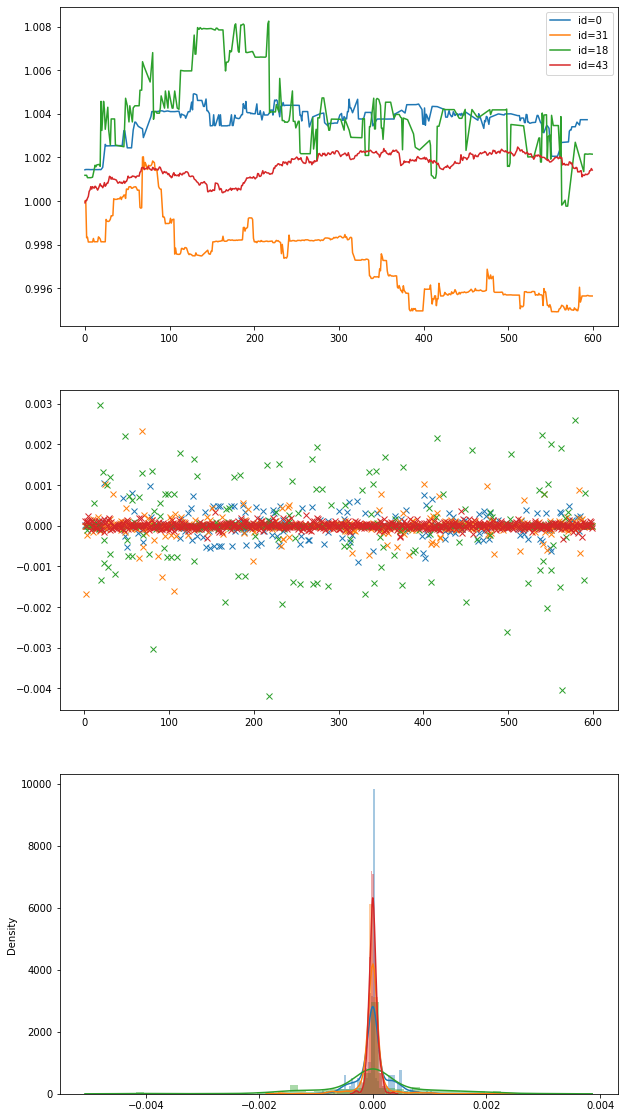

In [81]:
plt.figure(figsize=(10,20))
tid = 5
for i,book in enumerate(book_trainparquet_list):
    book_tid = book[book['time_id']==tid]
    wap = calc_wap(book_tid)
    plt.subplot(3,1,1)
    plt.plot(book_tid['seconds_in_bucket'],wap,label='id='+str(train_list[i]))
    plt.legend()

    logreturn = log_return(wap)
    plt.subplot(3,1,2)
    plt.plot(book_tid['seconds_in_bucket'],logreturn,"x")

    plt.subplot(3,1,3)
    sns.distplot(logreturn)
    realized_vol = realized_volatility(logreturn)
    print("id=",train_list[i])
    print(realized_vol)

plt.show()


# 時系列データ分析
